## Why Stats Matter Example

Let's say you work for a real-estate company and you and two-other co-workers are tasked with modeling the price of homes given their area in the city of Denver. You are trying to look at aggregate or global behavior of prices in the city.

Here's the plan of action. Since you clearly can't collect data about every home, you need to randomly sample. Assume there are 500000  homes in Denver. (For this example, ignore differences due to neighborhoods, and other strata effects)

1. You: Randomly sample 50 homes.
2. Joe: Randomly samples 50 homes.
3. Shmoe: Randomly samples 50 homes.

Also, here's a secret unknown to you at the time of your work. It turns out that the home prices are generated from the following model: 


$$P = 3 * A + .5 + \epsilon$$ 

P = Price in 100k's  
A = Area in 1k's square feet  
$\epsilon \sim \textit{N($\mu$ = 0,$\sigma^2$ = 2)}$. This represents random effects. Central Limit Theorem preview

### Let's simulate the sampling process:

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.mlab as mlab
from scipy import stats

mu = 0
sigma = 2

area_you = np.random.uniform(1,5,size = 15)
price_you = area_you * 3 + .5 + sigma * np.random.randn(1,15)


area_joe = np.random.uniform(1,5,size = 15)
price_joe = area_joe * 3 + .5 + sigma * np.random.randn(1,15)


area_shmoe = np.random.uniform(1,5,size = 15)
price_shmoe = area_shmoe * 3 + .5 + sigma * np.random.randn(1,15)

### Let's create a scatter plot with all of the sampled houses

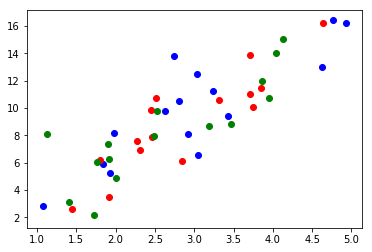

In [141]:
plt.scatter(area_you,price_you,color = ['blue'])
plt.scatter(area_joe,price_joe,color = ['red'])
plt.scatter(area_shmoe,price_shmoe,color = ['green'])

plt.show()

### Now let's model each  using a Linear Regression model

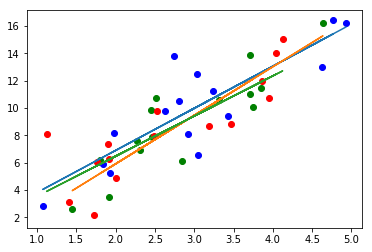

In [142]:
price_reg_you = LinearRegression()
price_reg_joe = LinearRegression()
price_reg_shmoe = LinearRegression()

#area_you.reshape(-1,1)
price_reg_you.fit(area_you.reshape(-1,1),price_you.reshape(-1,1))
plt.scatter(area_you,price_you,color = ['blue'])
plt.plot(area_you,price_reg_you.predict(area_you.reshape(-1,1)))

price_reg_joe.fit(area_joe.reshape(-1,1),price_joe.reshape(-1,1))
plt.scatter(area_joe,price_joe,color = ['green'])
plt.plot(area_joe,price_reg_joe.predict(area_joe.reshape(-1,1)))

price_reg_shmoe.fit(area_shmoe.reshape(-1,1),price_shmoe.reshape(-1,1))
plt.scatter(area_shmoe,price_shmoe,color = ['red'])
plt.plot(area_shmoe,price_reg_shmoe.predict(area_shmoe.reshape(-1,1)))


plt.show()

### Let's look at the regression coefficients

In [147]:
print 'The slope for the price of your regression is: {0}'.format(price_reg_you.coef_[0,0])
print 'The slope for the price of Joe\'s regression is: {0}'.format(price_reg_joe.coef_[0,0])
print 'The slope for the price of Shmoe\'s regression is: {0}'.format(price_reg_shmoe.coef_[0,0])

The slope for the price of your regression is: 3.07824612913
The slope for the price of Joe's regression is: 3.54792825575
The slope for the price of Shmoe's regression is: 2.93390018306


### Who's right?

At this point your boss Mr. Dunnostats is really pissed off. He wants an explanation of why the answers differ. In fact, he wants to know the REAL slope (which is 3). What are you going to tell him?!

Why? Because as a real-estate investment company, it is crucial to know how much more money we can expect if we build or invest in houses with more square-footage.

## Homework

You will have to explore two things in this homework. What happens if 200 people ran the same experiment (not just You, Joe, and Shmoe)? What happens if each person sampled not 15 houses, but also more than that?

**Part I**: What happens if 200 people ran the same experiment? Your job is to calculate the coefficients for each of these people, make a histogram, and see what that looks like. What is the sample mean and standard deviation of the histogram?

Bonus: Use Kernel Density Estimation (KDE) techniques to infer a continuous probability density function of your histogram. Use a uniform, triangular, and Epanechnikov kernels and compare distributions.

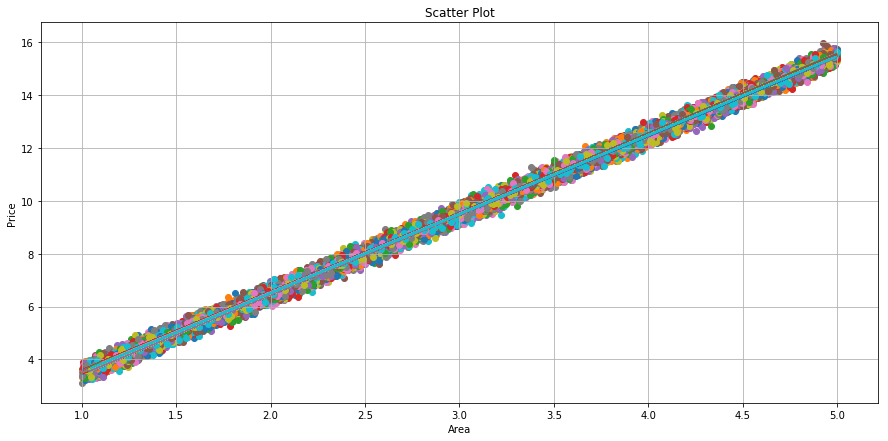

In [207]:
#Do part I here!
sampler_number = 200
sample_size = 100


def generate_samples(sampler_number, sample_size):
    samples = []
    sampler_count = 0
    while sampler_count < sampler_number:
        sample = {}
        sample['area'] = np.random.uniform(1,5,size = sample_size)
        sample['price'] = sample['area'] * 3 + .5 + sigma * np.random.randn(1,sample_size)
        samples.append(sample)
        sampler_count += 1
    return samples

def regression_analysis(samples):
    plt.figure(figsize=(15, 7)) ## Set figure size for the scatter plot
    for index, sample in enumerate(samples):
        #print 'sample = ', sample['area'] , '\n'
        price_reg = LinearRegression()
        price_reg.fit(sample['area'].reshape(-1,1),sample['price'].reshape(-1,1))
        plt.scatter(sample['area'],sample['price'], cmap=plt.cm.RdYlGn)
        plt.plot(sample['area'],price_reg.predict(sample['area'].reshape(-1,1)))

    plt.title('Scatter Plot')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    
samples = generate_samples(sample_number, sample_size)

regression_analysis(samples)

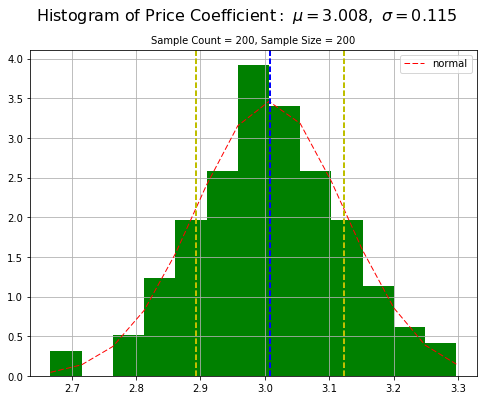

In [226]:
from scipy.stats import norm

def histogram_analysis(samples,sample_size):
    sample_count = len(samples)
    reg_coefficients = []
    plt.figure(figsize=(8, 6)) ## Set figure size for the histogram
    for index, sample in enumerate(samples):
        price_reg = LinearRegression()
        price_reg.fit(sample['area'].reshape(-1,1),sample['price'].reshape(-1,1))
        #print 'The slope for the price of your regression is: {0}'.format(price_reg.coef_[0,0])
        reg_coefficients.append(price_reg.coef_[0,0])

    (mu, sigma) = norm.fit(reg_coefficients)

    n, bins, patches = plt.hist(reg_coefficients, bins='auto', facecolor='green', normed=1)

    y = mlab.normpdf(bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=1, label='normal')
    

    plt.suptitle(r'$\mathrm{Histogram\ of\ Price\ Coefficient:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma), fontsize=16, fontweight='bold')
    plt.title("Sample Count = {}, Sample Size = {}".format(sample_count,sample_size), fontsize=10)
    plt.axvline(mu, color='b', linestyle='dashed', linewidth=2) #mean
    plt.axvline(mu + sigma, color='y', linestyle='dashed', linewidth=2) #std dev
    plt.axvline(mu - sigma, color='y', linestyle='dashed', linewidth=2) #std dev
    plt.grid(True)
    plt.legend()
    plt.show()
    return

histogram_analysis(samples,sample_size)

**Part II**: Increase the sample size. What if each of your 200 people sampled 50,100,200,... homes instead of 15? In this problem, let n = sample size vary from 15 --> 200. Do the following:

1. For each sample size, calculate the resulting coefficient histogram for the 200 people. 
2. Plot histogram only for n = 15, 50,100,200.
3. Describe what the histogram looks like. Use terms such as bi-modal, skewed, symmetric, kurtosis, etc? 
4. Plot the mean and standard deviation as functions of n. 

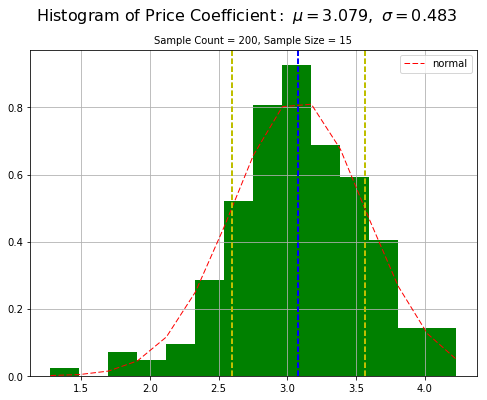

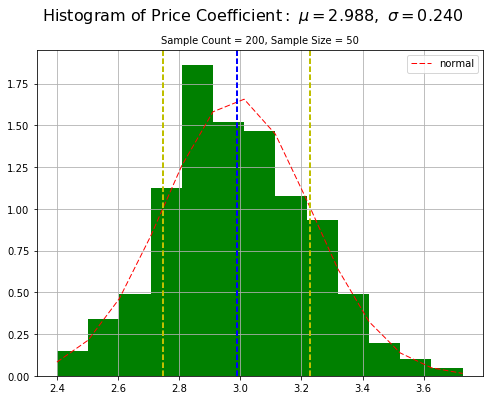

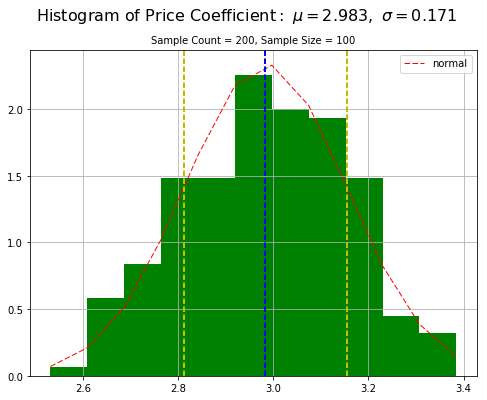

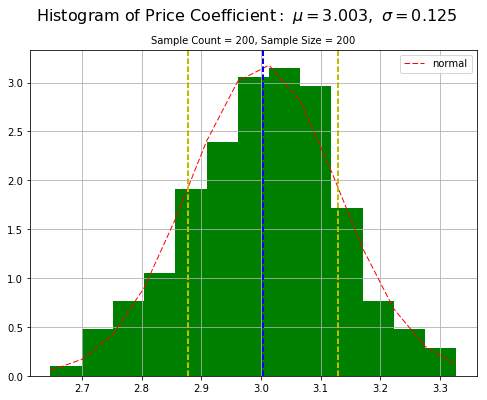

In [227]:
#Do part II here!
sample_sizes = (15,50,100,200)

for sample_size in sample_sizes:
    samples = generate_samples(200,sample_size)
    histogram_analysis(samples,sample_size)
    
